In [1]:
import pandas as pd
import matplotlib as mpl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab

plt.style.use('default')
plt.rcParams['figure.figsize'] = [3.0,3.0]

df = pd.read_csv('data/train.csv',dtype={'tipodepropiedad':'category','ciudad':'category','provincia':'category'})
df['fecha'] = pd.to_datetime(df['fecha'])
df['anio de publicacion'] = df['fecha'].dt.year
df["mes de publicacion"] = df['fecha'].dt.month
df["dia de publicacion"] = df['fecha'].dt.day
df['preciousd'] = df['precio']/20

In [2]:
#Distrito federal precio de tipo de propiedad para ver si son mas baratos los apartamentos y las casas
df['metrostotales'].fillna(df['metroscubiertos'], inplace=True)
df['metroscubiertos'].fillna(df['metrostotales'], inplace=True)
df['precioUSD'] = df['precio'] / 20
df['preciom2USD'] = df['precioUSD'] / df['metrostotales']

In [3]:
b = df[["provincia","tipodepropiedad","id"]]
b = b.pivot_table(index="provincia",columns="tipodepropiedad",values= "id", aggfunc= "count" ).fillna(value=0).T
b = b.transform(lambda x: (x * 100) / x.sum())

Text(0.5, 24.0, 'Provincias')

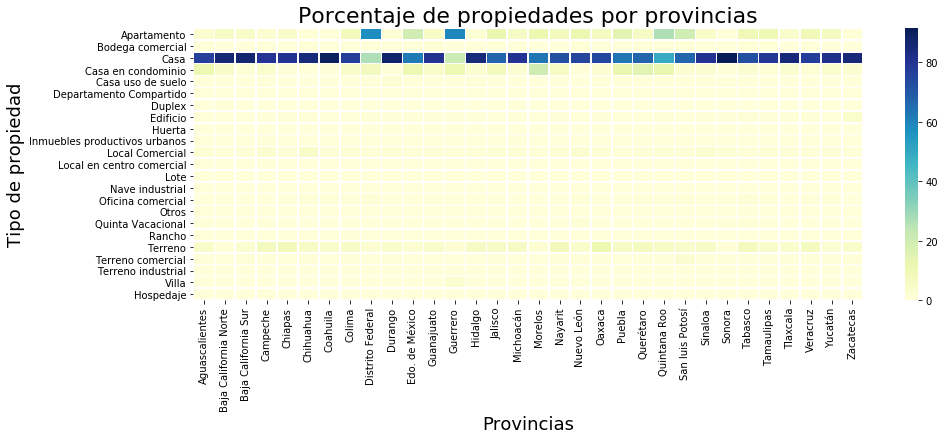

In [4]:
plt.figure(figsize=(15,5))
g = sns.heatmap(b,  cmap="YlGnBu", linewidths=.5,)

g.set_ylim(23,-0,1)
g.set_title("Porcentaje de propiedades por provincias", fontsize=22)
g.set_ylabel("Tipo de propiedad",fontsize=18)
g.set_xlabel("Provincias", fontsize=18)

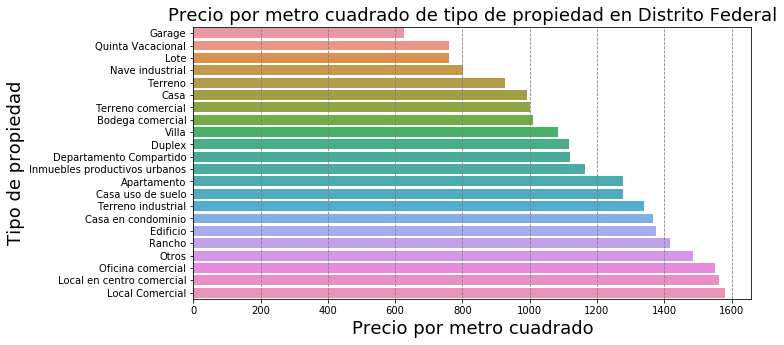

In [5]:
provincia_a_analizar = "Distrito Federal"
plt.figure(figsize=(10,5))

b = df
b = b[b["provincia"]== provincia_a_analizar]
b = b.groupby("tipodepropiedad").agg({"preciom2USD":"mean"}).sort_values(by="preciom2USD")
b = b[~(b.preciom2USD.isnull())]
g = sns.barplot(x=b["preciom2USD"],y=b.index, order=b.index)
g.set_title("Precio por metro cuadrado de tipo de propiedad en Distrito Federal", fontsize=18)
g.set_ylabel("Tipo de propiedad",fontsize=18)
g.set_xlabel("Precio por metro cuadrado", fontsize=18)
g.xaxis.grid(linestyle='dashed', color='gray')


En los ultimos dos graficos se ve que para Distrito federal hay una mayor cantidad de Apartamentos que Casas, y que estos tienen mayor valor por metro cuadrado que las casas. El tipo de propiedad con mas valor son los comerciales

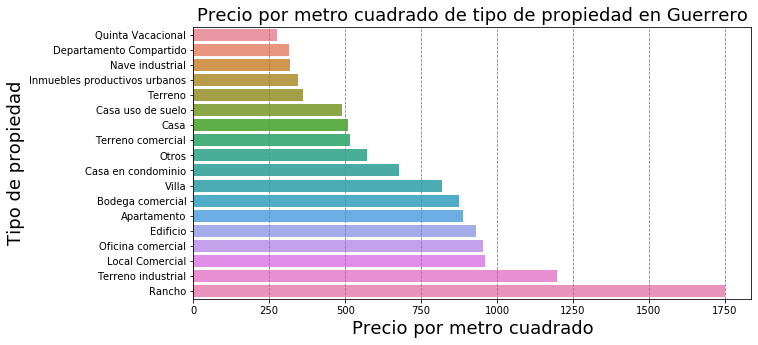

In [6]:
provincia_a_analizar = "Guerrero"
plt.figure(figsize=(10,5))

b = df
b = b[b["provincia"]== provincia_a_analizar]
b = b.groupby("tipodepropiedad").agg({"preciom2USD":"mean"}).sort_values(by="preciom2USD")
b = b[~(b.preciom2USD.isnull())]
g = sns.barplot(x=b["preciom2USD"],y=b.index, order=b.index)
g.set_title("Precio por metro cuadrado de tipo de propiedad en Guerrero", fontsize=18)
g.set_ylabel("Tipo de propiedad",fontsize=18)
g.set_xlabel("Precio por metro cuadrado", fontsize=18)
g.xaxis.grid(linestyle='dashed', color='gray')


In [7]:
prob_plot = df.groupby("metroscubiertos").agg({"preciousd":"mean"})
prob_plot = prob_plot.reset_index()
prob_plot = prob_plot[~((prob_plot["metroscubiertos"]<95) & (prob_plot["preciousd"]>30000))]
prob_plot["preciousd"] = np.log1p(prob_plot["preciousd"])

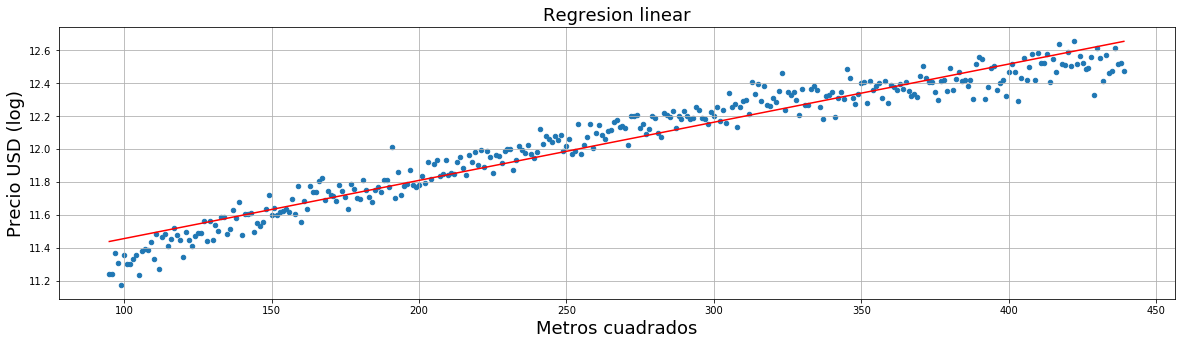

In [14]:
g = prob_plot.plot(kind="scatter",x="metroscubiertos",y="preciousd",figsize=(20,5),grid=True)
g.set_xlabel("Metros cuadrados",fontsize=18)
g.set_ylabel("Precio USD (log)", fontsize=18)
g.set_title("Regresion linear", fontsize=18)
z = np.polyfit(prob_plot["metroscubiertos"], prob_plot["preciousd"], 1)
p = np.poly1d(z)
pylab.plot(prob_plot["metroscubiertos"],p(prob_plot["metroscubiertos"]),"r")

In [9]:
df["banos"] = df["banos"].dropna()
df["habitaciones"] = df["habitaciones"].dropna()

plot = df.pivot_table(index="banos",columns="habitaciones",values="preciom2usd",aggfunc="mean")

KeyError: 'preciom2usd'

In [ ]:
plt.figure(figsize=(15,5))
g = sns.heatmap(plot,  cmap="YlGnBu", linewidths=.5)
g.set_ylim(4,-0,1)
g.set_title("Precio del m2 segun cantidad de baños y habitaciones", fontsize=22)
g.set_xlabel("Cant de ambientes",fontsize=18)
g.set_ylabel("Cant de baños", fontsize=18)
